# Report for Research Track Assignment II

This project builds upon the previous iteration's work, accessible at: https://github.com/alihaidersays/research-track-2-a1. 

The primary objective of this project is to enhance the user interface of the previous version, which lacked user-friendliness and visual appeal. In the previous iteration, users could only initiate and terminate the simulation without receiving any feedback or insights regarding the robot's actions. To address these limitations, we utilized Jupyter Notebook to create an improved interactive interface for our mobile robot simulation. Additionally, we employed the Matplotlib library to visually represent the robot's data, enabling users to analyze its behavior and performance more effectively throughout the simulation.

The repository provided includes packages and a simulation environment for controlling a mobile robot in the Gazebo simulator. The main focus of this project is to improve the user interface, which has been developed in Jupyter Notebook. This assignment serves as an extension of its previous iteration, assignment 1, which can be accessed at: https://github.com/alihaidersays/research-track-2-a1.

Before proceeding with the instructions, it is important to have ROS1 installed on your system. Please ensure that you have it installed before proceeding. The repository consists of three branches. The first branch is named "main", and the second branch is named "sphinx". Both branches contain the same project but with different styles of documentation. The "main" branch utilizes Doxygen for documentation, while the "sphinx" branch utilizes the Sphinx tool.

The user interface provides the following options for interacting with the simulation:

#### 1. Start and Stop button:

By clicking the 'Start' button, the simulation will initiate in the Gazebo environment. Initially, the robot will enter the 'random goal position' state, which was developed in assignment 1 using the 'action server'. In this state, a random target position within the grid is assigned to the robot, which it must reach. Once the robot reaches the target position, the 'state_machine_action' node assigns a new random target to the robot, and this cycle continues indefinitely. The user can interrupt the simulation by clicking the 'Stop' button. Upon clicking the 'Stop' button, the robot's ongoing action is immediately canceled, showcasing one of the advantages of using the action server.

In [1]:
import sys
sys.executable

'/usr/bin/python3'

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import jupyros as jr
from nav_msgs.msg import Odometry
import time
from matplotlib import animation, rc
from actionlib_msgs.msg import GoalStatusArray
from geometry_msgs.msg import Twist
import ipywidgets as widgets
from std_msgs.msg import String, Int32MultiArray
import rospy
import math
# Simulation 1:
sim_flag = "off"


# Initializing rosnode.
rospy.init_node('robot_control_node')
pub1 = rospy.Publisher('user_interface_sig', String, queue_size=10)
    

start_button = widgets.Button(description="START")
stop_button = widgets.Button(description="STOP")
output = widgets.Text(value="Click 'Start' Button to start the simulation.",disabled=True)

def on_start_button_clicked(b):
    global sim_flag
    output.value = 'Simulation Start'
    pub1.publish("1")
    sim_flag = "on"
        
def on_stop_button_clicked(b):
    global sim_flag
    output.value = 'Simulation Stop'
    pub1.publish("0")
    sim_flag = "off"


start_button.on_click(on_start_button_clicked)
stop_button.on_click(on_stop_button_clicked)

widgets.HBox([widgets.VBox([start_button, stop_button]), output])

#### 2. Setting linear and angular velocity

The user has the ability to adjust the linear and angular velocity of the robot using slider bars displayed below. By default, the sliders are positioned at the lowest level, indicating that the robot is moving at its slowest speed. The sliders can be moved to increase the velocity. These sliders set the values of the linear and angular velocity factors, which are utilized to generate the new velocities of the robot. When the slider bar is at its maximum position, with a value of '1.0', the robot's velocity will be twice that of its default velocity.

In [3]:
from IPython.display import display

pub = rospy.Publisher('control_speed', Twist, queue_size=10)

msg = Twist()

a = widgets.FloatSlider(min=0.0, max=1.0)
display(a)

b = widgets.FloatSlider(min=0.0, max=1.0)
display(b)


def on_value_change(change):
    global msg
    msg.linear.x = change['new']
    output.value = 'Simulation Start!'
    pub.publish(msg)
    
def on_valueang_change(change):
    global msg
    msg.angular.z = change['new']
    pub.publish(msg)

a.observe(on_value_change, names='value')
b.observe(on_valueang_change, names='value')

FloatSlider(value=0.0, max=1.0)

FloatSlider(value=0.0, max=1.0)

#### 3. Directly controlling robot motion using buttons:

The user can directly control the robot's movements using five buttons. These buttons enable forward and backward movement, left and right turns, as well as stopping the robot. At any point during the simulation, the user can interrupt the robot's "random target position" state by clicking any of these buttons. This action cancels the previously assigned random target, transitioning the robot into a state where the user has direct control over its movements.

In [4]:
pub2 = rospy.Publisher('/cmd_vel', Twist, queue_size=1)
    
msg2 = Twist()
    
f_button = widgets.Button(description="Forward")
r_button = widgets.Button(description="Right")
l_button = widgets.Button(description="Left")
b_button = widgets.Button(description="Backward")
s_button = widgets.Button(description="Stop")
output1 = widgets.Text(value="Click Buttons to control the robot.", disabled=True)

def on_f_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
    
    msg2.linear.x = 0.5
    msg2.angular.z = 0.0
    pub2.publish(msg2)
    output1.value = 'Forward!'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'
        
def on_r_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
    
    msg2.angular.z = 0.5
    pub2.publish(msg2)
    output1.value = 'Right!'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'

def on_l_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
        
    msg2.angular.z = -0.5
    pub2.publish(msg2)
    output1.value = 'Left'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'
    
def on_b_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
    
    msg2.linear.x = -0.5
    msg2.angular.z = 0.0
    pub2.publish(msg2)
    output1.value = 'Backward!'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'

    
def on_s_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
        
    msg2.linear.x = 0.0
    msg2.angular.z = 0.0
    pub2.publish(msg2)
    output1.value = 'Stop!'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'
    
f_button.on_click(on_f_button_clicked)
r_button.on_click(on_r_button_clicked)
l_button.on_click(on_l_button_clicked)
b_button.on_click(on_b_button_clicked)
s_button.on_click(on_s_button_clicked)

widgets.HBox([l_button, widgets.VBox([f_button, b_button]), r_button, s_button, output1])

The interface also provides visual feedback to the user through various components.

#### 1. Visualization of Robot's 2D Trajectory:

The graph displayed below illustrates the robot's position trajectory in the x and y axes within a {-5 x 5} grid. The trajectory is obtained by subscribing to the '\odom' topic in ROS, providing the robot's position coordinates. To dynamically plot the graph, the animation module of the Matplotlib library is used. This ensures continuous updates of the trajectory as the robot moves within the Gazebo simulation.

In [5]:
# First set up the figure and the axis 
fig3, ax3 = plt.subplots()

ax3.set_xlim(( -5, 5))
ax3.set_ylim((-5, 5))

line, = ax3.plot([], [], 'ro')
x_data=[]
y_data=[]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
from nav_msgs.msg import Odometry

def init():
    line.set_data([], [])
    return (line,)


def odom_callback(msg):
    y_data.append(msg.pose.pose.position.y)
    x_data.append(msg.pose.pose.position.x)

def animate(i):
    line.set_data(x_data, y_data)
    return (line,)


sub1 = rospy.Subscriber('/odom', Odometry, odom_callback)

In [7]:
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig3, animate, init_func=init,
                               frames=100, interval=20, blit=True)


#### 2. Bar Graph for Successful and Cancelled Targets:

The bar graph depicted below presents the count of successful and canceled targets reached by the robot. These counts are stored in variables within the 'go_to_point_action' node. Regularly publishing the total counts to the '/success_goals' and '/cancel_goals' topics allows the interface to subscribe and update the bar graph dynamically. The plotting function is called within the callback functions of these topic subscribers.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

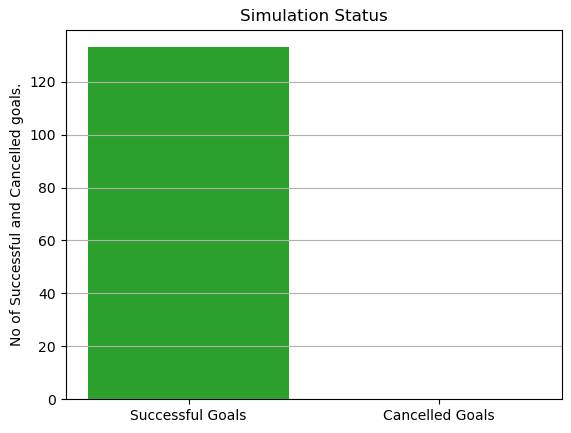

In [8]:
from IPython import display

no_of_succ_goals = 0
no_of_cancel_goals = 0

# Build the plot
fig1, ax1 = plt.subplots()
hdisplay1 = display.display("", display_id=True)


def succ_status_callback(msg):
        num = int(msg.data)
        s = "succ"
        pltsin1(num,s)

def cancel_status_callback(msg):      
        num = int(msg.data)
        s = "can"
        pltsin1(num,s)
                
def pltsin1(n,c):
    global no_of_succ_goals
    global no_of_cancel_goals
    
    if(c == "succ"):
        no_of_succ_goals = n
    else:
        no_of_cancel_goals = n
        
    items = ['Successful Goals', 'Cancelled Goals']
    x_pos = np.arange(len(items))
    CTEs = [no_of_succ_goals, no_of_cancel_goals]
    ax1.set_ylabel('No of Successful and Cancelled goals.')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(items)
    ax1.set_title('Simulation Status')
    ax1.bar(x_pos, CTEs, align='center', alpha=1.0)
    ax1.yaxis.grid(True)
    hdisplay1.update(fig1)
    
    
sub2 = rospy.Subscriber('/success_goals', String, succ_status_callback)
sub3 = rospy.Subscriber('/cancel_goals', String, cancel_status_callback)


plt.close(fig1)

#### 3. Histogram for Time Taken to Reach Targets:

The histogram shown below plots the time taken by the robot to reach all assigned targets. A timer is associated with each target, automatically stopping when the robot successfully reaches its position. The 'go_to_point_action' node stores the timer data for successfully reached targets in a list, which is then published to the ROS topic '/task_time'. By subscribing to this topic, the interface extracts the data and dynamically updates the histogram by invoking the plotting function within the topic subscriber's callback.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

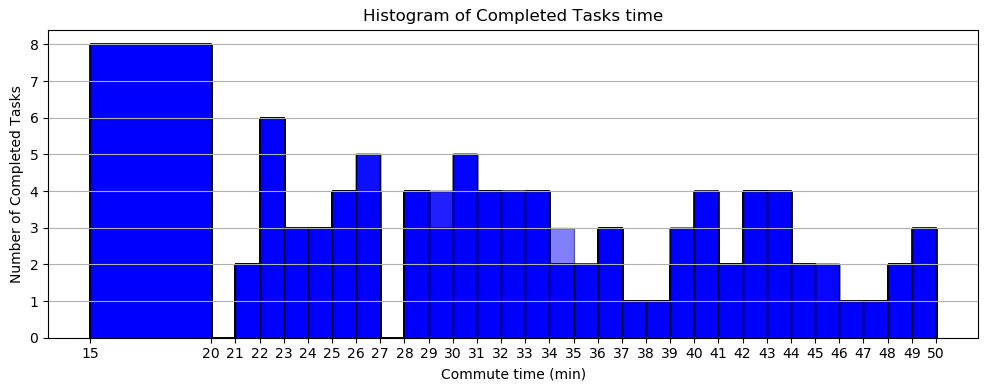

In [9]:
import math

output_sim1 = widgets.Text(value="Time",disabled=True)


#time_taken_array = []
# Build the plot
fig2, ax2 = plt.subplots(1,figsize=(12,4))
hdisplay2 = display.display("", display_id=True)

def callback_time_taken(msg):
    output_sim1.value = str(msg.data[0])
    bin_edges = [15,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
    ax2.set_xlabel('Commute time (min)')
    ax2.set_ylabel('Number of Completed Tasks')
    ax2.set_xticks([15,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50])
    ax2.set_title('Histogram of Completed Tasks time')
    ax2.hist(msg.data, bins=bin_edges, density=False, histtype='bar', color='b', edgecolor='k', alpha=0.5)
    ax2.yaxis.grid(True)
    hdisplay2.update(fig2)
    
    
sub4 = rospy.Subscriber('/task_time', Int32MultiArray, callback_time_taken)

plt.close(fig2)

#### 4. Line Plot for Comparing Command Velocity vs. Actual Velocity:

The two graphs displayed below compare the actual (linear and angular) velocities of the robot to the command velocities. Velocity data is obtained from the '\odom' and 'cmd_vel' ROS topics, and separate list variables in the interface store this information. To enable dynamic plotting, the Matplotlib library's animation module is utilized. This allows continuous updates of the velocity graphs as the robot moves within the Gazebo simulation. Initiating the plotting process is achieved by clicking the "Start Plot" button.

In [10]:
output_sim2 = widgets.Text(value="Cmd angular velocity",disabled=True)
output_sim3 = widgets.Text(value="Cmd linear velocity",disabled=True)
output_sim4 = widgets.Text(value="Time",disabled=True)
output_sim5 = widgets.Text(value="Odom angular velocity",disabled=True)
output_sim6 = widgets.Text(value="Odom linear velocity",disabled=True)
output_sim7 = widgets.Text(value="Click Button to Start the Plot.",disabled=True)
plotStartButton = widgets.Button(description="Start Plot")

In [11]:
%matplotlib widget

# constants for angular velocity
x_ang = []
z_cmd = []
z_odom = []

# constants for linear velocity
x_lin = []
x_cmd = []
x_odom = []

# constants for extras:
count = 0
start_plot = False

fig5, (ax5,ax6) = plt.subplots(2,figsize=(6,10))

ang_cmd, = ax5.plot([])
ang_odom, = ax5.plot([])
lin_cmd, = ax6.plot([])
lin_odom, = ax6.plot([])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
def animate_plot(i):
    #global count
    count = time.time()
    x_lin.append(count)
    x_ang.append(count)
    
    output_sim4.value = str(count)  
    
    ax5.set_xticks(range(len(x_ang)), x_ang)
    ang_odom, = ax5.plot(z_odom, '-b')
    ang_cmd, = ax5.plot(z_cmd[0:len(z_cmd):32], '-r')
    
    ax6.set_xticks(range(len(x_lin)), x_lin)
    lin_odom, = ax6.plot(x_odom, '-b')
    lin_cmd, = ax6.plot(x_cmd[0:len(x_cmd):32], '-r')

    return ang_odom, lin_odom, lin_cmd, ang_cmd,
    

def init_plot():
    
    prev_time_stamp = math.floor(time.time())
    
    ax5.set_ylabel('Velocity')
    ax5.set_xlabel('Time')
    ax5.set_title('Angular Velocity')
    
    ax6.set_ylabel('Velocity')
    ax6.set_xlabel('Time')
    ax6.set_title('Linear Velocity')
    
    ax6.set_ylim(-1,1)
    ax6.axhline(0, color='black', lw=1)
    
    ax5.set_ylim(-1,1)
    ax5.axhline(0, color='black', lw=1)
    
    
    ang_odom, = ax5.plot(z_odom, '-b', label='ang_odom')
    
    # Downsampling the 'cmd_vel' signal to match with 'odom signal'.
    ang_cmd, = ax5.plot(z_cmd[0:len(z_cmd):32], '-r', label='ang_cmd')
    ax5.legend(loc="upper right")
    
    lin_odom, = ax6.plot(x_odom, '-b', label='lin_odom')
    # Downsampling the 'cmd_vel' signal to match with 'odom signal'.
    lin_cmd, = ax6.plot(x_cmd[0:len(x_cmd):32], '-r', label='lin_cmd')
    ax6.legend(loc="upper right")

    return ang_odom, lin_odom, lin_cmd, ang_cmd, 


def callback_cmd_vel(msg):
    if(start_plot):
        z = []
        z.append(msg.angular.x)
        z.append(msg.angular.y)
        z.append(msg.angular.z)
        
        # By default only 'z' component of the angular velocity is plotting but complete magnitude can be plot as well.
        # Uncomment this line of code plotting magnitude.
        #output_sim2.value = str(round(math.sqrt(sum(i**2 for i in z)),3))
        #z_cmd.append(round(math.sqrt(sum(i**2 for i in z)),3))
        
        output_sim2.value = str(round(msg.angular.z,3))
        z_cmd.append(round(msg.angular.z,3))
        z = []
        z.append(msg.linear.x)
        z.append(msg.linear.y)
        z.append(msg.linear.z)
        
        # By default only 'x' component of the linear velocity is plotting but complete magnitude can be plot as well.
        # Uncomment this line of code plotting magnitude.
        #output_sim3.value = str(round(math.sqrt(sum(i**2 for i in z)),3))
        #x_cmd.append(round(math.sqrt(sum(i**2 for i in z)),3))
        
        output_sim3.value = str(round(msg.linear.x,3))
        x_cmd.append(round(msg.linear.x,3))
        z = []
    
def callback_odom2(msg):
    if(start_plot):
        v = []
        v.append(msg.twist.twist.angular.x)
        v.append(msg.twist.twist.angular.y)
        v.append(msg.twist.twist.angular.z)
        
        # By default only 'x' component of the linear velocity is plotting but complete magnitude can be plot as well.
        # Uncomment this line of code plotting magnitude.
        #output_sim5.value = str(round(math.sqrt(sum(i**2 for i in v)),3))
        #z_odom.append(round(math.sqrt(sum(i**2 for i in v)),3))
        
        output_sim5.value = str(round(msg.twist.twist.angular.z,3))
        z_odom.append(round(msg.twist.twist.angular.z,3))
        v = []
        v.append(msg.twist.twist.linear.x)
        v.append(msg.twist.twist.linear.y)
        v.append(msg.twist.twist.linear.z)
                
        # By default only 'x' component of the linear velocity is plotting but complete magnitude can be plot as well.
        # Uncomment this line of code plotting magnitude.
        #output_sim6.value = str(round(math.sqrt(sum(i**2 for i in v)),3))
        #x_odom.append(round(math.sqrt(sum(i**2 for i in v)),3))
        
        output_sim6.value = str(round(msg.twist.twist.linear.x,3))
        x_odom.append(round(msg.twist.twist.linear.x,3))
        v = []

def on_plotStartButton(b):
    global start_plot
    
    if(start_plot == False):
        output_sim7.value = 'Plotting is On'
        start_plot = True
        plotStartButton.description = "Stop!"
    else:
        start_plot = False
        output_sim7.value = 'Plotting is OFF'
        plotStartButton.description = "Start!"

    
sub5 = rospy.Subscriber('/cmd_vel', Twist, callback_cmd_vel)
sub6 = rospy.Subscriber('/odom', Odometry, callback_odom2)
plotStartButton.on_click(on_plotStartButton)
widgets.HBox([plotStartButton, output_sim7])

In [13]:
ani = animation.FuncAnimation(fig5, animate_plot, init_func=init_plot, interval=1000, blit=True)

In [14]:
widgets.VBox([widgets.HBox([output_sim2, output_sim3, output_sim4]),widgets.HBox([output_sim5, output_sim6])])